In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

In [176]:
'''
x=datasets.load_iris().data[:10]
data=x
y=datasets.load_iris().target[:10]
'''

'\nx=datasets.load_wine().data[:10]\ndata=x\ny=datasets.load_wine().target[:10]\n'

In [177]:
x=datasets.load_iris().data
data=x
y=datasets.load_iris().target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

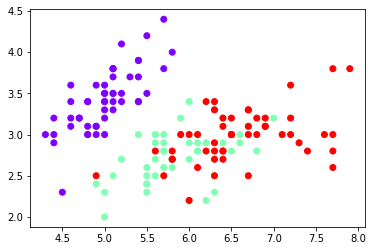

In [179]:
plt.scatter(data[:,0],data[:,1],c=y,cmap='rainbow' )


In [126]:
#AgglomerativeClustering?

In [181]:
clust_ward=AgglomerativeClustering(n_clusters=3,linkage='ward')
clust_complete=AgglomerativeClustering(n_clusters=3,linkage='complete')
clust_average=AgglomerativeClustering(n_clusters=3,linkage='average')

In [197]:
pred_ward=clust_complete.fit_predict(data)
pred_complete=clust_ward.fit_predict(data)
pred_average=clust_average.fit_predict(data)

To determine which clustering result better matches the original labels of the samples, we can use ```adjusted_rand_score``` which is an *external cluster validation index* which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).

Cluster validation indices are discussed later in the course.

In [198]:
from sklearn.metrics import adjusted_rand_score
print(f"ward_score={adjusted_rand_score(y,pred_ward)}")
print(f"complete_score={adjusted_rand_score(y,pred_complete)}")
print(f"average_score={adjusted_rand_score(y,pred_average)}")

ward_score=0.64225125183629
complete_score=0.7311985567707745
average_score=0.7591987071071522


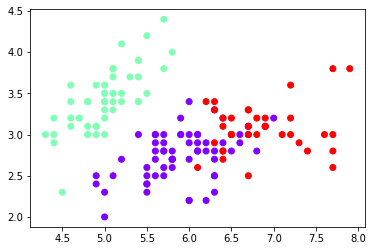

In [185]:
plt.scatter(data[:,0],data[:,1],c=pred_average,cmap='rainbow' )


# Effect of scaling

In [210]:
from sklearn.preprocessing import normalize

In [211]:
new_data=normalize(data)

In [212]:
pred_ward=clust_complete.fit_predict(new_data)
pred_complete=clust_ward.fit_predict(new_data)
pred_average=clust_average.fit_predict(new_data)

In [213]:
from sklearn.metrics import adjusted_rand_score
print(f"ward_score={adjusted_rand_score(y,pred_ward)}")
print(f"complete_score={adjusted_rand_score(y,pred_complete)}")
print(f"average_score={adjusted_rand_score(y,pred_average)}")

ward_score=0.644447235392006
complete_score=0.8856970310281228
average_score=0.5583714437541352


# Dendrogram Visualization

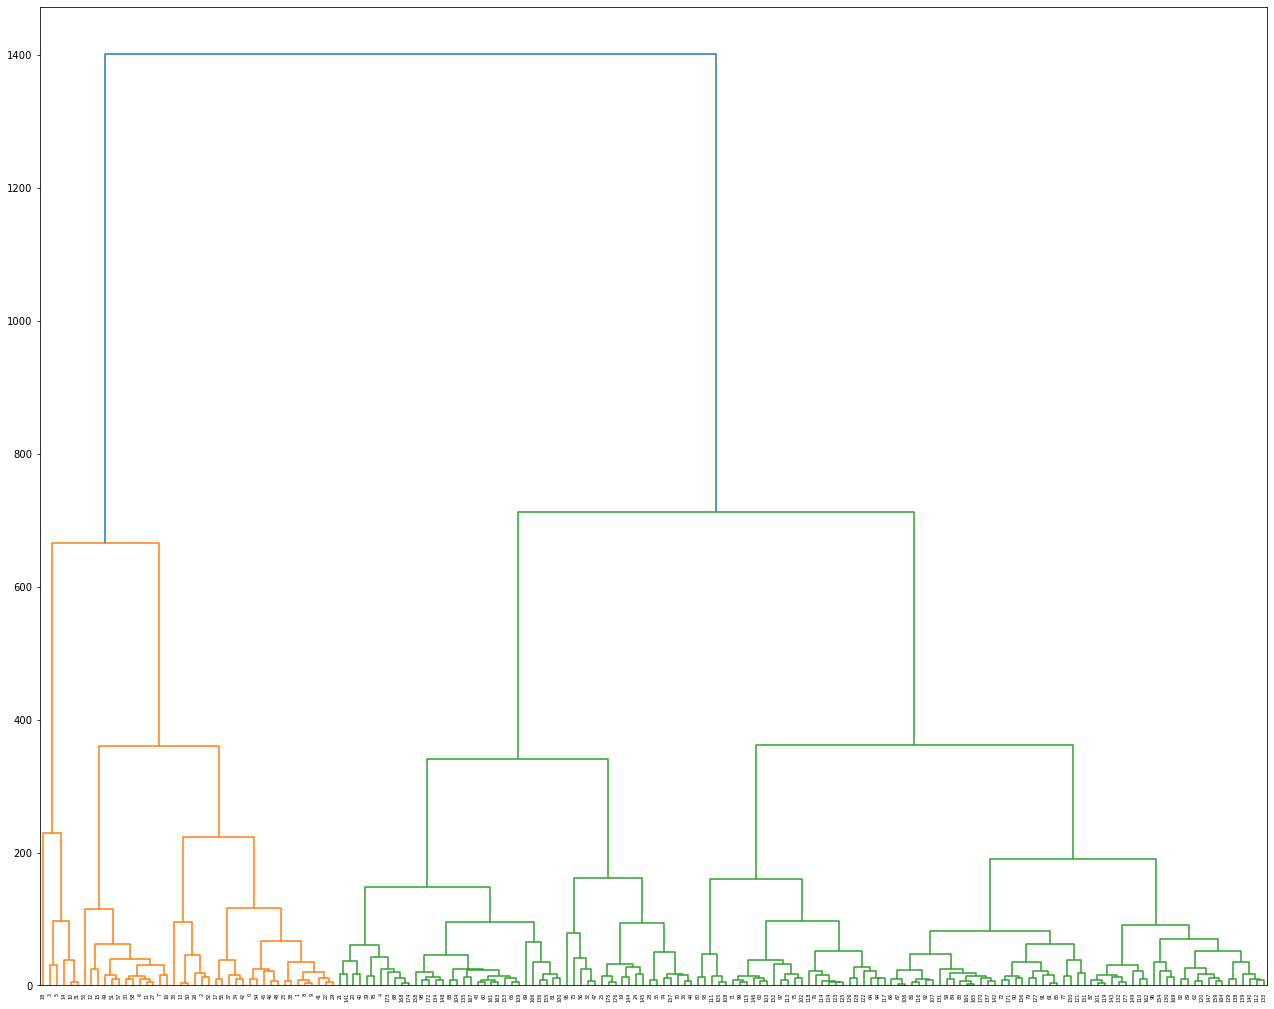

In [214]:
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(22,18))
link_matrix=linkage(new_data,'ward') #ward ,complete,average
dendrogram(link)
plt.show()

##  Visualization with Seaborn's ```clustermap``` 


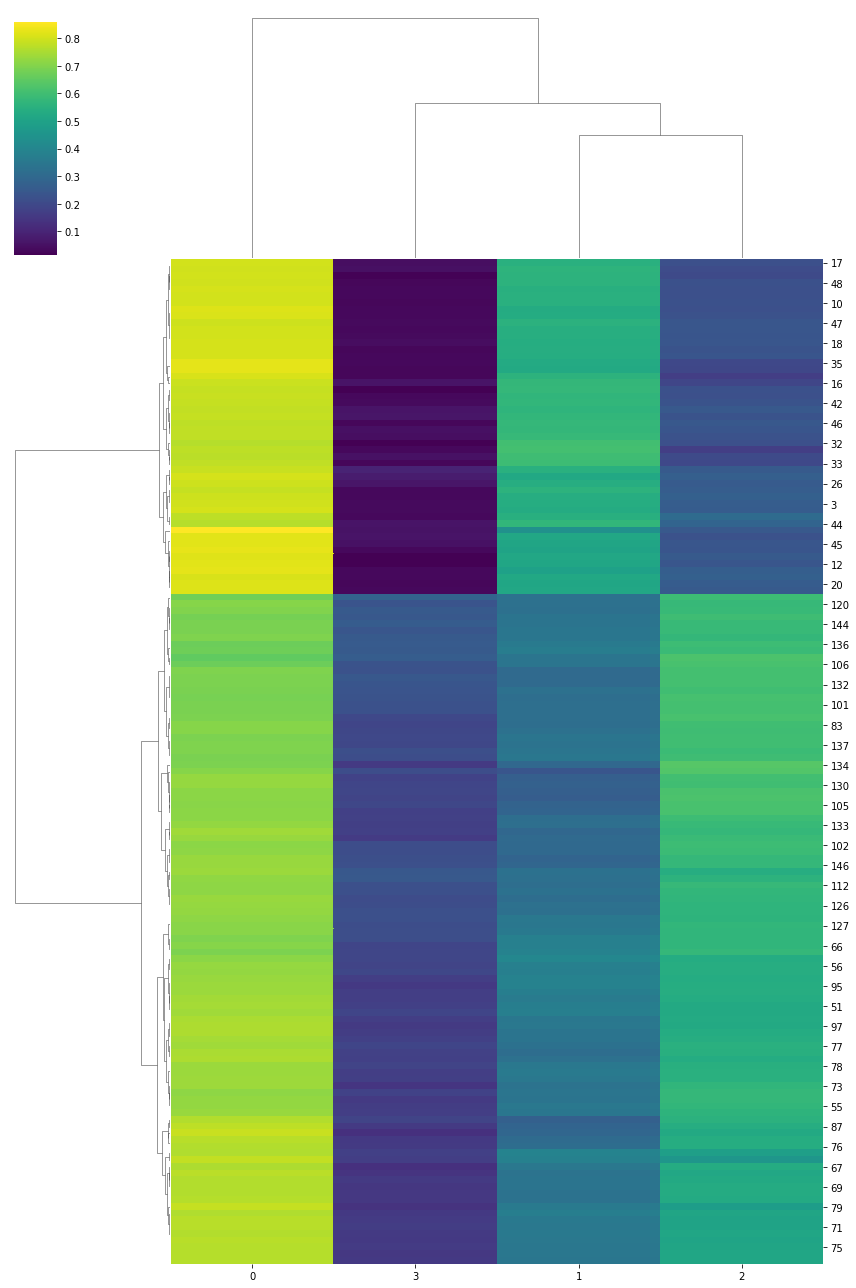

In [215]:
sns.clustermap(new_data,figsize=(12,18),method='ward',cmap='viridis')
plt.show()